### We read in the data

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 20, 10
import pandas as pd
import numpy as np


day_hour_count = pd.read_csv('~/Desktop/bikeshare_hour_count.csv')
day_hour_count

,hour,monday,tuesday,wednesday,thursday,friday,saturday,sunday
0,0.0,21.0,34.0,43.0,47.0,51.0,89.0,106.0
1,0.1,39.0,22.0,27.0,37.0,56.0,87.0,100.0
2,0.2,31.0,24.0,26.0,42.0,50.0,98.0,77.0
3,0.3,26.0,27.0,25.0,29.0,52.0,99.0,87.0
4,0.4,19.0,24.0,29.0,29.0,50.0,98.0,69.0
...,...,...,...,...,...,...,...,...
235,23.5,36.0,65.0,60.0,94.0,80.0,93.0,28.0
236,23.6,37.0,61.0,66.0,100.0,81.0,95.0,28.0
237,23.7,30.0,42.0,49.0,80.0,101.0,105.0,27.0
238,23.8,33.0,52.0,47.0,79.0,91.0,93.0,24.0


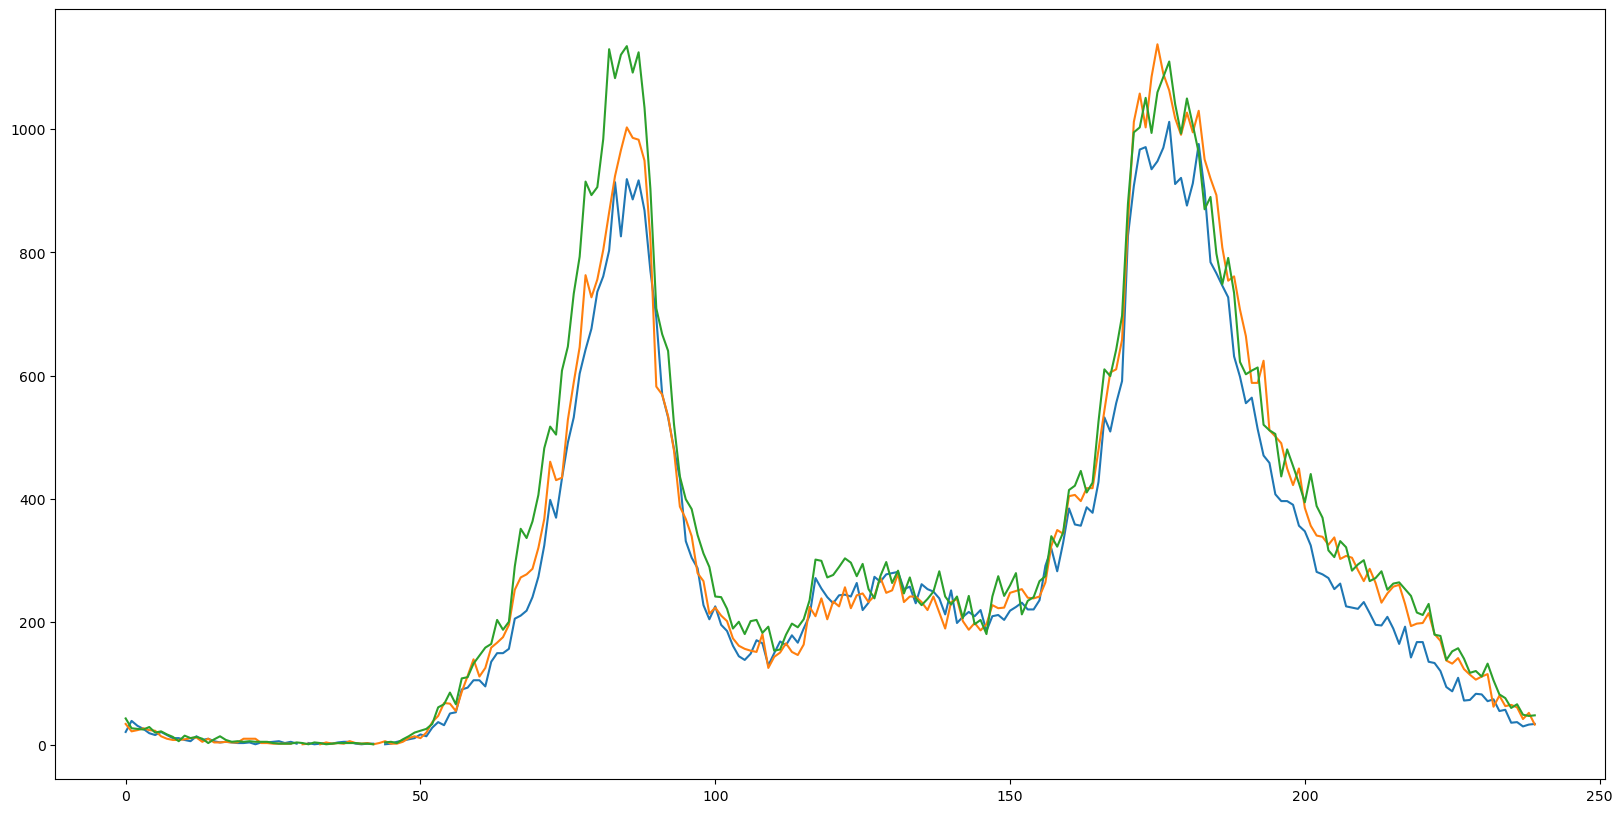

In [3]:
plt.figure(figsize=(20,10))
plt.plot(day_hour_count.index, day_hour_count["monday"])
plt.plot(day_hour_count.index, day_hour_count["tuesday"])
plt.plot(day_hour_count.index, day_hour_count["wednesday"])

# Assignment 4


Explain the results in a **paragraph + charts** of  to describe which model you'd recommend. This means show the data and the model's line on the same chart. The paragraph is a simple justification and comparison of the several models you tried.

# 1. Using the **`day_hour_count`** dataframe create 4 dataframes `monday`, `tuesday`, `saturday` and `sunday` that represent the data for those days. (hint: Monday is day=0)

In [4]:
monday = day_hour_count[["hour","monday"]].copy()

In [5]:
monday

,hour,monday
0,0.0,21.0
1,0.1,39.0
2,0.2,31.0
3,0.3,26.0
4,0.4,19.0
...,...,...
235,23.5,36.0
236,23.6,37.0
237,23.7,30.0
238,23.8,33.0


In [6]:
tuesday = day_hour_count[["hour","tuesday"]].copy()

In [7]:
tuesday

,hour,tuesday
0,0.0,34.0
1,0.1,22.0
2,0.2,24.0
3,0.3,27.0
4,0.4,24.0
...,...,...
235,23.5,65.0
236,23.6,61.0
237,23.7,42.0
238,23.8,52.0


In [8]:
saturday = day_hour_count[["hour","saturday"]].copy()

In [9]:
saturday

,hour,saturday
0,0.0,89.0
1,0.1,87.0
2,0.2,98.0
3,0.3,99.0
4,0.4,98.0
...,...,...
235,23.5,93.0
236,23.6,95.0
237,23.7,105.0
238,23.8,93.0


In [10]:
sunday = day_hour_count[["hour","sunday"]].copy()

In [11]:
sunday

,hour,sunday
0,0.0,106.0
1,0.1,100.0
2,0.2,77.0
3,0.3,87.0
4,0.4,69.0
...,...,...
235,23.5,28.0
236,23.6,28.0
237,23.7,27.0
238,23.8,24.0



## 2a. Create 3 models fit to (`x=hour`, `y=monday`)  with varying polynomial degrees ( choose from `n=5,15,20`). (Repeat for `saturday` below)

## Plot all the results for each polynomial.

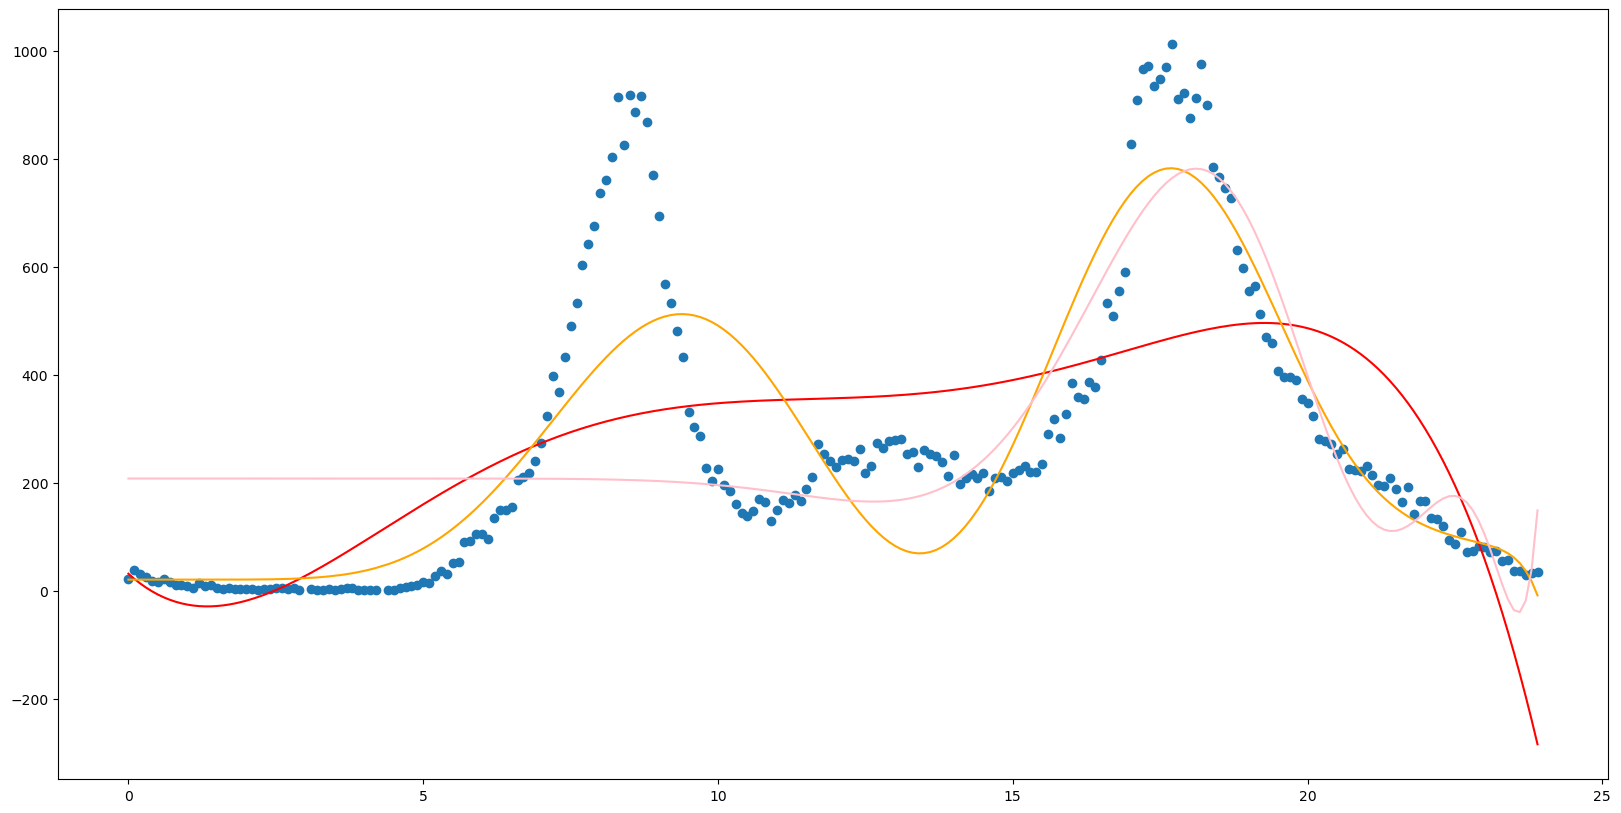

In [27]:
from sklearn.preprocessing import PolynomialFeatures
import sklearn
from sklearn import linear_model
monday = monday.dropna()

#monday
hour = monday['hour'].to_numpy()
mon_y = monday['monday'].to_numpy()

hour = hour.reshape(-1,1)
mon_y = mon_y.reshape(-1, 1)

#n=5 
poly_5 = PolynomialFeatures(degree=5)
hour_5 = poly_5.fit_transform(hour)

mon_5 = linear_model.LinearRegression()
mon_5.fit(hour_5, mon_y)

#n=15 
poly_15 = PolynomialFeatures(degree=15)
hour_15 = poly_15.fit_transform(hour)

mon_15 = linear_model.LinearRegression()
mon_15.fit(hour_15, mon_y)

#n=20 
poly_20 = PolynomialFeatures(degree=20)
hour_20 = poly_20.fit_transform(hour)

mon_20 = linear_model.LinearRegression()
mon_20.fit(hour_20, mon_y)

plt.scatter(hour, mon_y)
plt.plot(hour, mon_5.predict(hour_5), c='red')
plt.plot(hour, mon_15.predict(hour_15), c='orange')
plt.plot(hour, mon_20.predict(hour_20), c='pink')

## 2b. Repeat `2a` for `saturday`

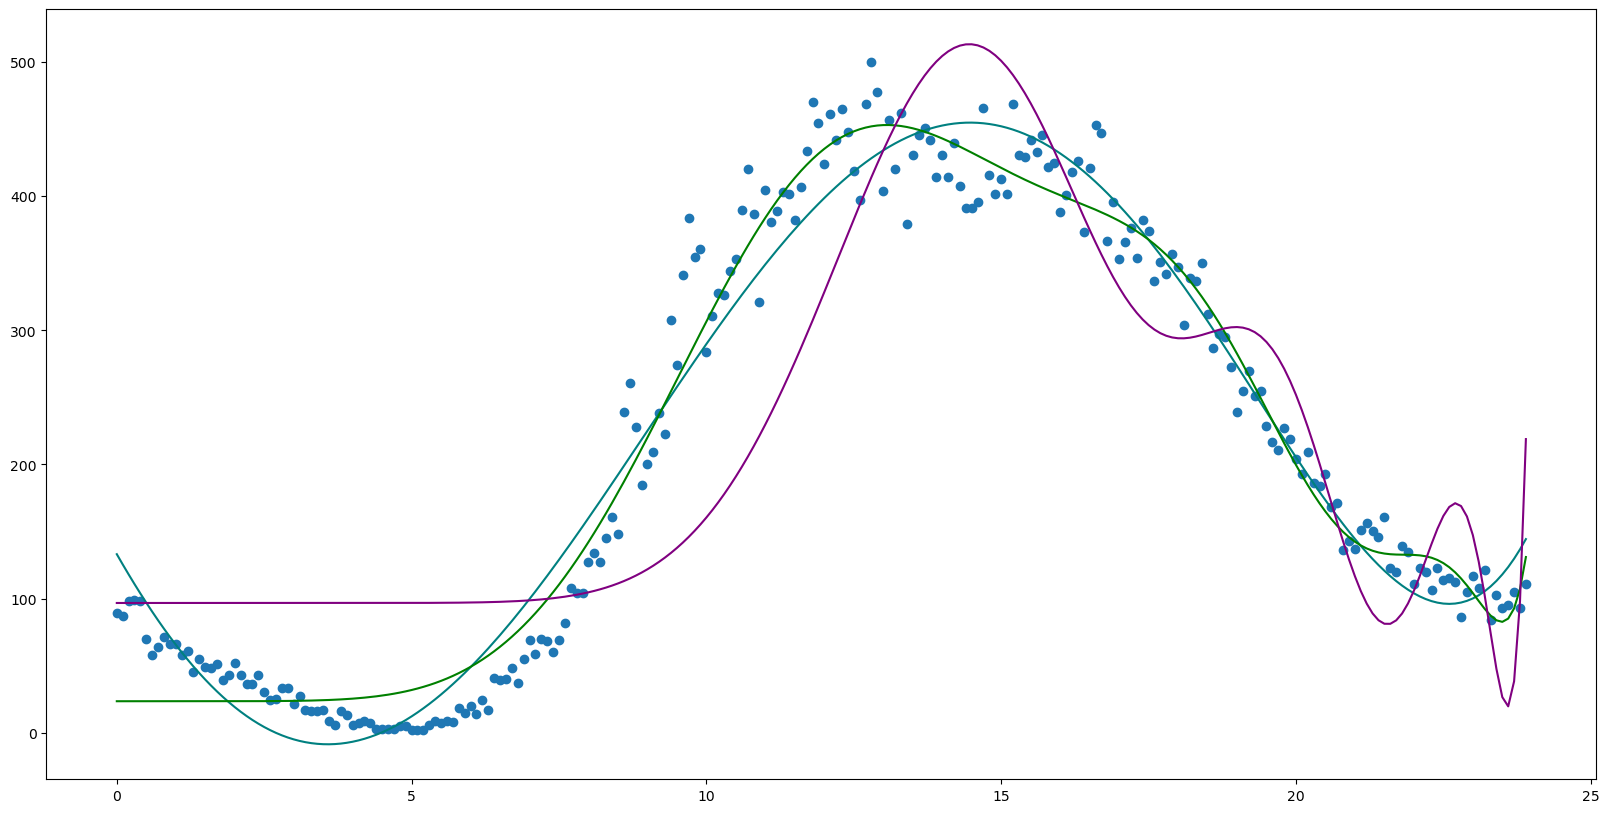

In [30]:
saturday = saturday.dropna()

#saturday 
sat_hour = saturday['hour'].to_numpy()
sat_y = saturday['saturday'].to_numpy()

sat_hour = sat_hour.reshape(-1,1)
sat_y = sat_y.reshape(-1, 1)

#n=5 
poly_5 = PolynomialFeatures(degree=5)
sat_hour_5 = poly_5.fit_transform(sat_hour)

sat_5 = linear_model.LinearRegression()
sat_5.fit(sat_hour_5, sat_y)

#n=15
poly_15 = PolynomialFeatures(degree=15)
sat_hour_15 = poly_15.fit_transform(sat_hour)

sat_15 = linear_model.LinearRegression()
sat_15.fit(sat_hour_15, sat_y)

#n=20
poly_20 = PolynomialFeatures(degree=20)
sat_hour_20 = poly_20.fit_transform(sat_hour)

sat_20 = linear_model.LinearRegression()
sat_20.fit(sat_hour_20, sat_y)

plt.scatter(sat_hour, sat_y)
plt.plot(sat_hour, sat_5.predict(sat_hour_5), c='teal')
plt.plot(sat_hour, sat_15.predict(sat_hour_15), c='green')
plt.plot(sat_hour, sat_20.predict(sat_hour_20), c='purple')

## 3. Using the best `monday` model's prediction, determine the errors (MSE, MAE, MAPE) between the prediction with the `monday` and `tuesday` datasets

## Repeat for `saturday`/`sunday`


In [37]:
#Monday/Tuesday
import sklearn.metrics as metrics
monday = monday.dropna()
tuesday = tuesday.dropna()


(
    metrics.mean_squared_error(monday['monday'], mon_15.predict(hour_15)),
    metrics.mean_absolute_error(monday['monday'], mon_15.predict(hour_15)),
    metrics.mean_absolute_percentage_error(monday['monday'], mon_15.predict(hour_15))
)


(
    metrics.mean_squared_error(tuesday['tuesday'], mon_15.predict(hour_15)),
    metrics.mean_absolute_error(tuesday['tuesday'], mon_15.predict(hour_15)),
    metrics.mean_absolute_percentage_error(tuesday['tuesday'], mon_15.predict(hour_15))
)


(23857.05984599637, 105.91399483204333, 1.878198538836178)

In [38]:
#Saturday/Sunday
saturday = saturday.dropna()
sunday = sunday.dropna()


(
    metrics.mean_squared_error(saturday['saturday'], sat_5.predict(sat_hour_5)),
    metrics.mean_absolute_error(saturday['saturday'], sat_5.predict(sat_hour_5)),
    metrics.mean_absolute_percentage_error(saturday['saturday'], sat_5.predict(sat_hour_5))
)


(
    metrics.mean_squared_error(sunday['sunday'], sat_5.predict(sat_hour_5)),
    metrics.mean_absolute_error(sunday['sunday'], sat_5.predict(sat_hour_5)),
    metrics.mean_absolute_percentage_error(sunday['sunday'], sat_5.predict(sat_hour_5))
)


(1751.9785640317662, 33.091799433431284, 0.7723154684668728)

## 4. With `saturday`, use `train_test_split` to create training and test sets and build a model. Create predictions using the xtest from and determine the errors between these predictions and the ytest (MSE, MAE, MAPE).

## repeat for `monday`

('Mean Squared Error:',
 446.5268259178024,
 'Mean Absolute Error',
 16.2092077144239,
 'Mean Absolute Percentage Error',
 0.40026136552249464)

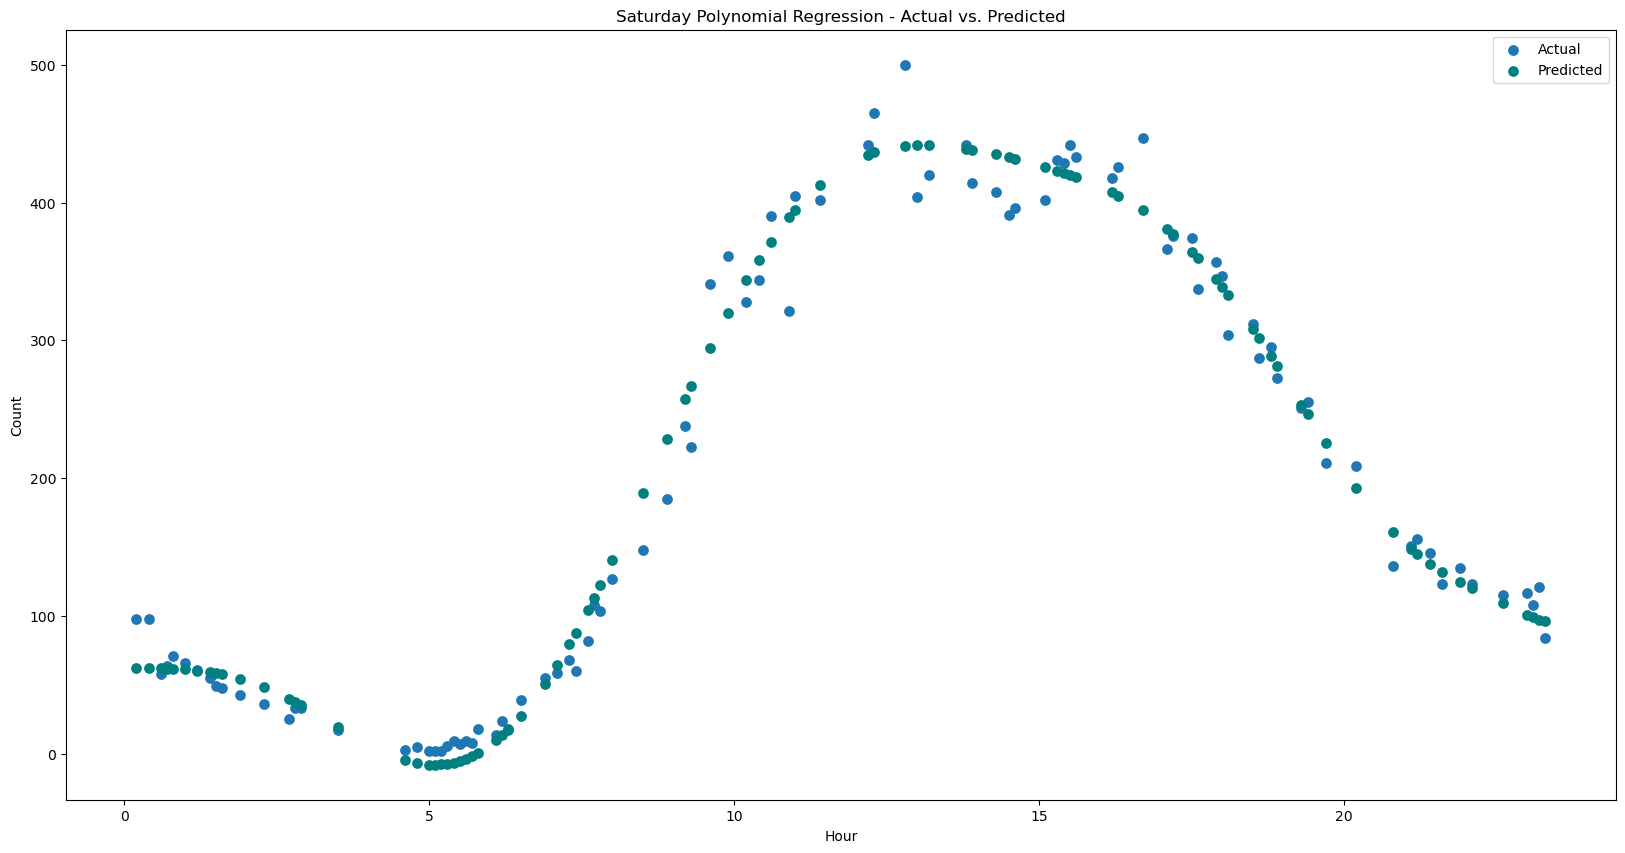

In [49]:
from sklearn.model_selection import train_test_split
sat2 = saturday.dropna()
satx = sat2[['hour']] 
saty = sat2[['saturday']] 
satx_train, satx_test, saty_train, saty_test = train_test_split(satx, saty, test_size=0.4, random_state=36)


satx_train12 = PolynomialFeatures(degree=12).fit_transform(satx_train)
satx_test12 = PolynomialFeatures(degree=12).fit_transform(satx_test)

linear12 = linear_model.LinearRegression().fit(satx_train12, saty_train)

size = 45
plt.scatter(satx_test, saty_test, s=size, label = 'Actual')
plt.scatter(satx_test, linear12.predict(satx_test12), c='Teal', s=size, label = 'Predicted')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.legend()
plt.title('Saturday Polynomial Regression - Actual vs. Predicted')

("Mean Squared Error:", 
 metrics.mean_squared_error(y_sat_test, linear12.predict(satx_test12)),
 "Mean Absolute Error",
metrics.mean_absolute_error(y_sat_test, linear12.predict(satx_test12)),
 "Mean Absolute Percentage Error",
metrics.mean_absolute_percentage_error(y_sat_test, linear12.predict(satx_test12))
)


('Mean Squared Error:',
 52866.49646864374,
 'Mean Absolute Error',
 177.32940600520783,
 'Mean Absolute Percentage Error',
 3.969064762558631)

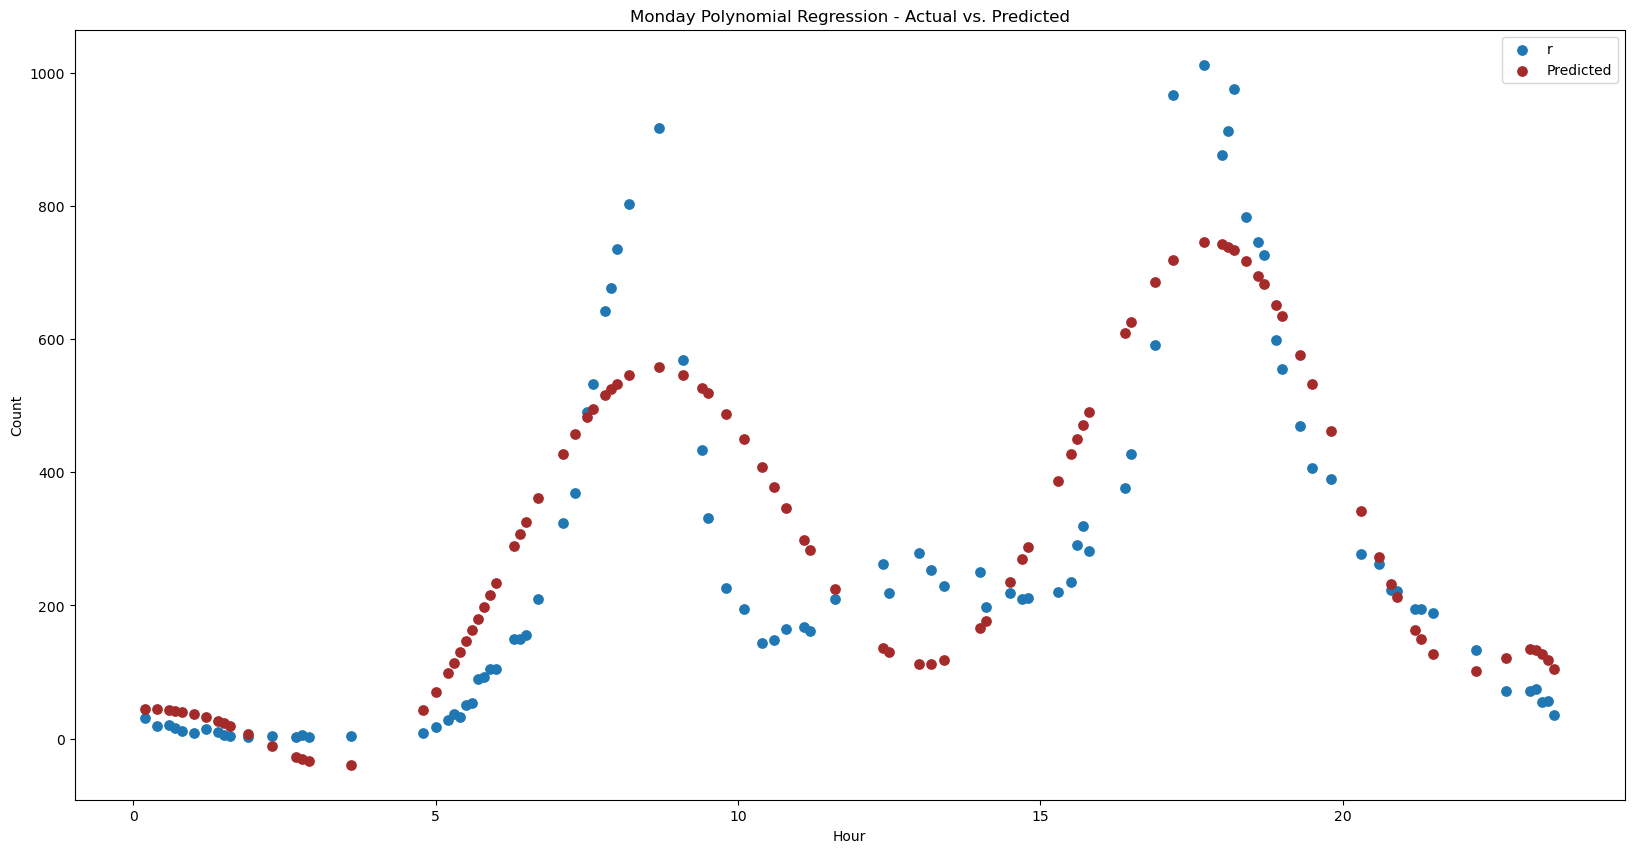

In [50]:
mon2 = monday.dropna()
monx = mon2[['hour']] 
mony = mon2[['monday']] 
monx_train, monx_test, mony_train, mony_test = train_test_split(monx, mony, test_size=0.4, random_state=36)


monx_train12 = PolynomialFeatures(degree=12).fit_transform(monx_train)
monx_test12 = PolynomialFeatures(degree=12).fit_transform(monx_test)

linear12 = linear_model.LinearRegression().fit(monx_train12, mony_train)

size = 45
plt.scatter(monx_test, mony_test, s=size, label = 'r')
plt.scatter(monx_test, linear12.predict(monx_test12), c='Brown', s=size, label = 'Predicted')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.legend()
plt.title('Monday Polynomial Regression - Actual vs. Predicted')

("Mean Squared Error:", 
 metrics.mean_squared_error(y_sat_test, linear12.predict(satx_test12)),
 "Mean Absolute Error",
metrics.mean_absolute_error(y_sat_test, linear12.predict(satx_test12)),
 "Mean Absolute Percentage Error",
metrics.mean_absolute_percentage_error(y_sat_test, linear12.predict(satx_test12))
)